# Plotting Sigmoid Function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x) =\frac{1}{1 + e^{-(wx +b)}}$ 

In [2]:
def sigmoid(x, w, b):
    return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [4]:
w = 0.9
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

In [5]:
type(X)

numpy.ndarray

In [6]:
type(Y)

numpy.ndarray

In [7]:
X

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

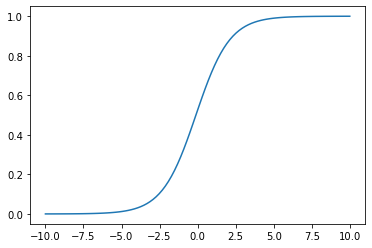

In [8]:
plt.plot(X,Y)
plt.show()

In [9]:
w = -0.1 #@param(type: "slider",min: -2, max: 2, step: 0.1)
b = 0.8
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

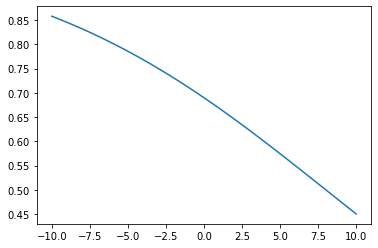

In [10]:
plt.plot(X,Y)
plt.show()

$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}} $

In [11]:
def sigmoid_2d (x1, x2, w1, w2, b):
    return 1 /(1 + np.exp(-(w1 * x1 + w2 * x2 + b)))

In [12]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [13]:
from mpl_toolkits import mplot3d

In [14]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

In [15]:
XX1, XX2 = np.meshgrid(X1, X2)

In [16]:
print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [17]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(XX1,XX2, w1, w2, b)

In [18]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

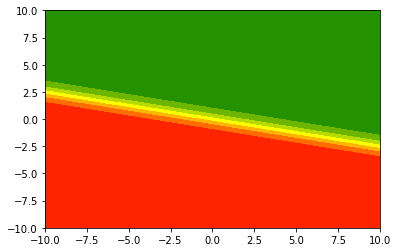

In [19]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap)
plt.show()

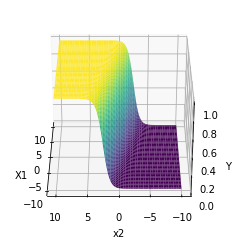

In [20]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('x2')
ax.set_zlabel("Y")

ax.view_init(30,180)

# Compute Loss for a Given Datasets

In [21]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

In [22]:
def calculate_loss(X,Y, w_est, b_est):
    loss = 0 
    for x, y in zip(X,Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [23]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [24]:
WW.shape

(101, 101)

In [25]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

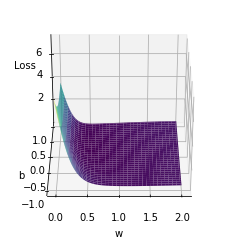

In [26]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel("Loss")
# 270 bais & 180 weight
ax.view_init(30,270)

In [27]:
np.argmin(Loss)

6388

In [28]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [29]:
print(i, j)

63 25


In [30]:
print(WW[i, j], BB[i, j])

0.5 0.26


In [151]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

# Class for Sigmoid Neuron 

In [155]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
        
        if initialise:
        # initialise w, b
            self.w = np.random.randn(X.shape[1])
            self.b = 0
            
        if display_loss:
            loss={}
    
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
                
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred, Y)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

# Fit for toy data

In [32]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [33]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [34]:
def plot_sn(X, Y, sn,ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2, = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
    ax.plot()

[-0.49137172 -1.1461409 ] 0.0008610370171927691
[ 0.12051671 -1.29802788] 0.020161549458697133
[ 0.26289676 -1.23321059] 0.04604600315211221
[ 0.41400469 -1.10995153] 0.08153814212479327
[ 0.62669496 -0.8907379 ] 0.1341803982154845
[ 0.93462821 -0.51296506] 0.18020538899842434
[ 1.15095819 -0.2040383 ] 0.10090703719835638
[ 1.12339889 -0.55871309] 0.008842202142328823
[ 1.30731143 -0.28046366] -0.060088723603763564
[ 1.2809852  -0.57225716] -0.1368994565775146
[ 1.4181594  -0.37053256] -0.1921909642091531
[ 1.41262742 -0.5464138 ] -0.2490724568683425
[ 1.49231251 -0.45701906] -0.29067834853308344
[ 1.51151721 -0.52338283] -0.3312009664296078
[ 1.55493924 -0.50978926] -0.3651669372516432
[ 1.58405443 -0.5288547 ] -0.39722178859338936
[ 1.61507386 -0.53585211] -0.4263892697596756
[ 1.64314856 -0.54541225] -0.4535140380973198
[ 1.66982822 -0.55379173] -0.4787235528572484
[ 1.69501594 -0.56181151] -0.5022656569787866


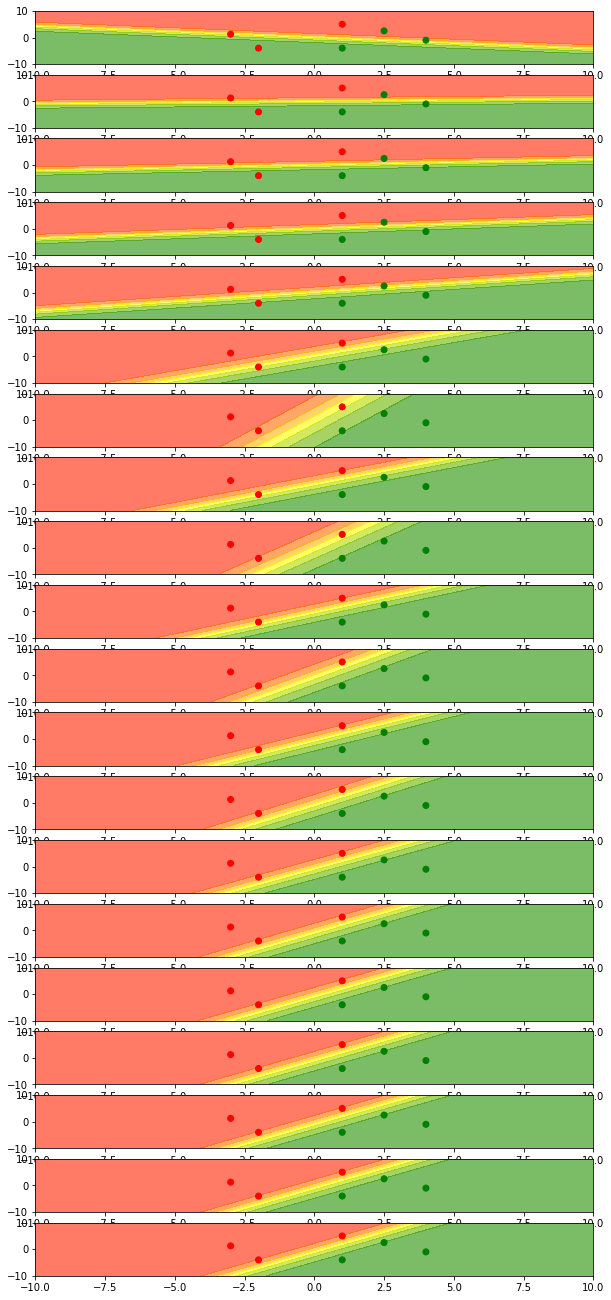

In [35]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize = (10, N+5))
for i in range(20):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i+1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.6, False)
    

# Working with realworld data

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('mobile_cleaned.csv')

In [38]:
df.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [39]:
df.shape

(341, 88)

In [43]:
X = df.drop('Rating', axis=1)
Y = df['Rating'].values

In [44]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [54]:
threshold = 4.2
df['Class'] = (df['Rating'] >= threshold).astype(np.int)

In [55]:
df['Class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    0
339    0
340    1
Name: Class, Length: 341, dtype: int32

In [56]:
df['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [58]:
Y_binarised = df['Class'].values

In [59]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## Standardisation


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
R = np.random.random([100,1])

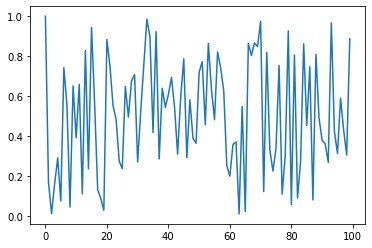

In [65]:
plt.plot(R)
plt.show()

In [66]:
np.mean(R)

0.5050745157949732

In [67]:
np.std(R) # compute the mean & std of the data 

0.2816268401816382

In [68]:
scaler = StandardScaler()

In [73]:
scaler.fit(R)

StandardScaler()

In [74]:
scaler.mean_

array([0.50507452])

In [75]:
RT = scaler.transform(R)

In [76]:
np.mean(RT)

2.042810365310288e-16

In [77]:
np.std(RT)

0.9999999999999998

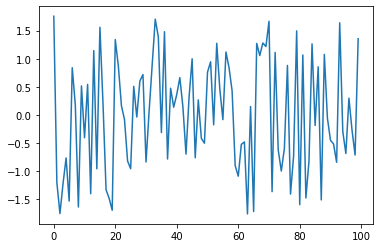

In [78]:
plt.plot(RT)
plt.show()

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, stratify=Y_binarised)

In [81]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [82]:
scaler = StandardScaler()

In [106]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
minmax_scaler = MinMaxScaler()

In [88]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [89]:
np.min(Y_scaled_train)

0.0

In [90]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [96]:
np.array([threshold]).reshape(1, -1)

array([[4.2]])

In [93]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [94]:
scaled_threshold

0.6800000000000002

In [100]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype('int').ravel()

In [101]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [102]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype('int').ravel()

In [103]:
Y_binarised_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

# Train on Real Data

In [156]:
sn = SigmoidNeuron() 

<ipython-input-155-66699a2b55b7>:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


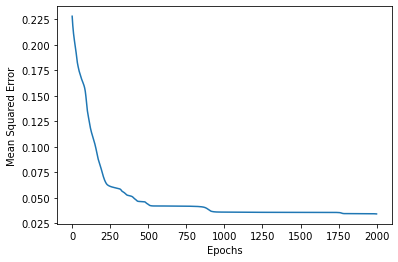

In [157]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss = True)

In [158]:
Y_pred_train =  sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [159]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype('int').ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype('int').ravel()

In [150]:
accuracy_train  = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)
print(accuracy_train, accuracy_test)

0.803921568627451 0.8372093023255814
